In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
from SciKit.utils import show_report
from sklearn.model_selection import RandomizedSearchCV


In [11]:
# Load the wine dataset
wine = load_wine(as_frame=True)

# Create a DataFrame
X = wine.data
y = wine.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Accuracy:  1.0


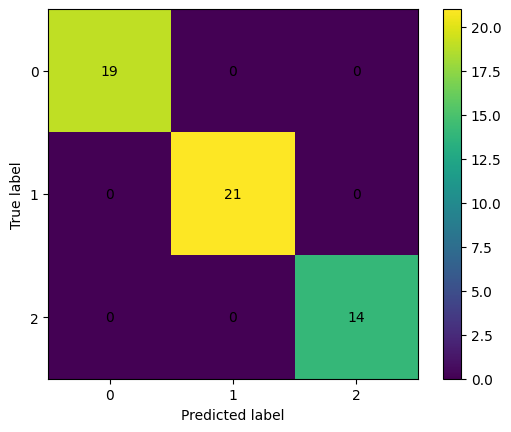

Confusion Matrix: 
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
Cross validation score: 0.9609523809523809


In [12]:
# Create a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Fit the model
gbc.fit(X_train, y_train)

# Make predictions
y_pred = gbc.predict(X_test)

# Calculate the accuracy
show_report(y_test, y_pred)

# Cross validation
scores = cross_val_score(gbc, X, y, cv=5).mean()
print(f"Cross validation score: {scores}")

Best parameters: {'n_estimators': 25, 'max_depth': 1, 'learning_rate': 0.5}
Best score: 0.9676666666666666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Accuracy:  1.0


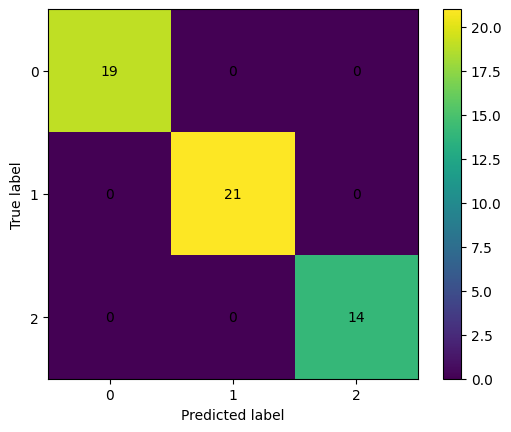

Confusion Matrix: 
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


In [13]:
# parameter tuning

param_grid = {
    'n_estimators': [10, 25, 50, 100, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
    'max_depth': [1, 2, 3, 4, 5]
}

# Create a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Grid search
grid_search = RandomizedSearchCV(gbc, param_grid, cv=5, n_iter=10, random_state=42, n_jobs=-1)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Best score
print(f"Best score: {grid_search.best_score_}")

# Show report 
show_report(y_test, y_pred)